# ANALISA PERBANDINGAN PUPUK INDONESIA DAN THAILAND

## RUMUSAN MASALAH
> Pertanian di Indonesia Bisa dikatakan lebih sedikit tertinggal dibandingkan dengan negara Thailand

> Tertinggalnya pertanian Indonesia dengan Thailand tidak terlepas dari Pengembangan pupuk di Indonesia

## Tujuan
> Membandingkan produksi dan penggunaan pupuk di Indonesia dengan Thailand

> Memberikan rekomendasi untuk menambahkan produksi pertanian di Indonesia melalui hasil analisis dari data yang ada

## Dataset
> Dataset yang digunakan dalam analisis ini diambil dari dataset yang dikeluarkan FAO 

> Dataset ini terdapat data produksi dan penggunaan pupuk dari semua negara di Dunia. 
> Maka dari itu, kita harus mengekstrak data yang hanya menunjukkan penggunaan pupuk di indonesia dan Thailand saja

> Dataset dikumpulkan dalam periode 2002 - 2017

## Kolom Data

Dalam dataset ini terdapat total 11 kolom, yaitu : 
1. Area Code
2. Area
3. Item Code
4. Item
5. Element Code
6. Element
7. Year Code
8. Year
9. Unit
10. Value
11. Flag


Namun, untuk mempermudah analisa, kolom yang digunakan ada sebagai berikut:
1. Area
2. Item
3. Element
4. Year
5. Unit
6. Value

In [45]:
#Import Libraries yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
df = pd.read_csv('FertilizersProduct.csv', encoding = "ISO-8859-1")
df

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R
...,...,...,...,...,...,...,...,...,...,...,...
164463,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2004,2004,tonnes,5.00,Fb
164464,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2008,2008,tonnes,2.13,Fb
164465,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2009,2009,tonnes,9.00,Fb
164466,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2010,2010,tonnes,4971.00,Fb


Detail data yang didapatkan

In [47]:
df.describe()

,Area Code,Item Code,Element Code,Year Code,Year,Value
count,164468.000000,164468.000000,164468.000000,164468.000000,164468.000000,1.644680e+05
mean,129.207493,4014.222098,5663.300387,2009.734125,2009.734125,9.460314e+04
std,73.530215,9.014672,211.588558,4.542937,4.542937,6.910195e+05
min,1.000000,4001.000000,5157.000000,2002.000000,2002.000000,-1.043000e+03
25%,66.000000,4006.000000,5610.000000,2006.000000,2006.000000,4.553000e+01
50%,126.000000,4014.000000,5622.000000,2010.000000,2010.000000,9.891650e+02
75%,196.000000,4022.000000,5910.000000,2014.000000,2014.000000,1.502811e+04
max,276.000000,4030.000000,5922.000000,2017.000000,2017.000000,4.904667e+07


In [48]:
df.describe(include="O")

,Area,Item,Element,Unit,Flag
count,164468,164468,164468,164468,164468
unique,171,23,6,2,9
top,Brazil,Urea,Import Quantity,tonnes,Qm
freq,1779,10491,45709,93377,135660


In [49]:
df.describe(include='all')

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
count,164468.000000,164468,164468.000000,164468,164468.000000,164468,164468.000000,164468.000000,164468,1.644680e+05,164468
unique,NaN,171,NaN,23,NaN,6,NaN,NaN,2,NaN,9
top,NaN,Brazil,NaN,Urea,NaN,Import Quantity,NaN,NaN,tonnes,NaN,Qm
freq,NaN,1779,NaN,10491,NaN,45709,NaN,NaN,93377,NaN,135660
mean,129.207493,NaN,4014.222098,NaN,5663.300387,NaN,2009.734125,2009.734125,NaN,9.460314e+04,NaN
std,73.530215,NaN,9.014672,NaN,211.588558,NaN,4.542937,4.542937,NaN,6.910195e+05,NaN
min,1.000000,NaN,4001.000000,NaN,5157.000000,NaN,2002.000000,2002.000000,NaN,-1.043000e+03,NaN
25%,66.000000,NaN,4006.000000,NaN,5610.000000,NaN,2006.000000,2006.000000,NaN,4.553000e+01,NaN
50%,126.000000,NaN,4014.000000,NaN,5622.000000,NaN,2010.000000,2010.000000,NaN,9.891650e+02,NaN
75%,196.000000,NaN,4022.000000,NaN,5910.000000,NaN,2014.000000,2014.000000,NaN,1.502811e+04,NaN


In [50]:
df.isna().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

### Mengekstrak Data Penggunaan Pupuk di Indonesia dan Thailand

In [51]:
ina=df.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],axis=1)
ina=ina.loc[ina.Area=='Indonesia']

In [52]:
thai=df.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],axis=1)
thai=thai.loc[thai.Area=='Thailand']

In [53]:
thai

,Area,Item,Element,Year,Unit,Value
144020,Thailand,"Ammonia, anhydrous",Import Quantity,2002,tonnes,252334.88
144021,Thailand,"Ammonia, anhydrous",Import Quantity,2003,tonnes,236766.25
144022,Thailand,"Ammonia, anhydrous",Import Quantity,2004,tonnes,302591.49
144023,Thailand,"Ammonia, anhydrous",Import Quantity,2005,tonnes,293943.28
144024,Thailand,"Ammonia, anhydrous",Import Quantity,2006,tonnes,276376.48
...,...,...,...,...,...,...
145311,Thailand,Urea and ammonium nitrate solutions (UAN),Export Value,2008,1000 US$,92.87
145312,Thailand,Urea and ammonium nitrate solutions (UAN),Export Value,2009,1000 US$,14.28
145313,Thailand,Urea and ammonium nitrate solutions (UAN),Export Value,2011,1000 US$,346.01
145314,Thailand,Urea and ammonium nitrate solutions (UAN),Agricultural Use,2003,tonnes,20.00


In [54]:
ina

,Area,Item,Element,Year,Unit,Value
66886,Indonesia,"Ammonia, anhydrous",Import Quantity,2002,tonnes,202.50
66887,Indonesia,"Ammonia, anhydrous",Import Quantity,2003,tonnes,0.02
66888,Indonesia,"Ammonia, anhydrous",Import Quantity,2004,tonnes,5.95
66889,Indonesia,"Ammonia, anhydrous",Import Quantity,2005,tonnes,25529.55
66890,Indonesia,"Ammonia, anhydrous",Import Quantity,2006,tonnes,5999.43
...,...,...,...,...,...,...
68166,Indonesia,Urea and ammonium nitrate solutions (UAN),Import Value,2015,1000 US$,2.00
68167,Indonesia,Urea and ammonium nitrate solutions (UAN),Import Value,2016,1000 US$,0.06
68168,Indonesia,Urea and ammonium nitrate solutions (UAN),Import Value,2017,1000 US$,6.38
68169,Indonesia,Urea and ammonium nitrate solutions (UAN),Export Quantity,2006,tonnes,0.01


### Menggabungkan Data Indonesia dan Thailand

In [55]:
frame = [ina, thai] 
asean = pd.concat(frame).drop_duplicates().reset_index(drop=True)

In [56]:
asean

,Area,Item,Element,Year,Unit,Value
0,Indonesia,"Ammonia, anhydrous",Import Quantity,2002,tonnes,202.50
1,Indonesia,"Ammonia, anhydrous",Import Quantity,2003,tonnes,0.02
2,Indonesia,"Ammonia, anhydrous",Import Quantity,2004,tonnes,5.95
3,Indonesia,"Ammonia, anhydrous",Import Quantity,2005,tonnes,25529.55
4,Indonesia,"Ammonia, anhydrous",Import Quantity,2006,tonnes,5999.43
...,...,...,...,...,...,...
2576,Thailand,Urea and ammonium nitrate solutions (UAN),Export Value,2008,1000 US$,92.87
2577,Thailand,Urea and ammonium nitrate solutions (UAN),Export Value,2009,1000 US$,14.28
2578,Thailand,Urea and ammonium nitrate solutions (UAN),Export Value,2011,1000 US$,346.01
2579,Thailand,Urea and ammonium nitrate solutions (UAN),Agricultural Use,2003,tonnes,20.00


#### Eksplorasi Data

In [57]:
asean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     2581 non-null   object 
 1   Item     2581 non-null   object 
 2   Element  2581 non-null   object 
 3   Year     2581 non-null   int64  
 4   Unit     2581 non-null   object 
 5   Value    2581 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


In [58]:
asean.isna().sum()

Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [59]:
asean.describe(include='all')

,Area,Item,Element,Year,Unit,Value
count,2581,2581,2581,2581.000000,2581,2.581000e+03
unique,2,23,6,NaN,2,NaN
top,Thailand,NPK fertilizers,Import Value,NaN,tonnes,NaN
freq,1296,166,629,NaN,1423,NaN
mean,NaN,NaN,NaN,2009.361875,NaN,2.259316e+05
std,NaN,NaN,NaN,4.455726,NaN,7.286954e+05
min,NaN,NaN,NaN,2002.000000,NaN,0.000000e+00
25%,NaN,NaN,NaN,2006.000000,NaN,8.664800e+02
50%,NaN,NaN,NaN,2009.000000,NaN,9.655800e+03
75%,NaN,NaN,NaN,2013.000000,NaN,8.864629e+04


In [60]:
asean.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2581.0,2009.361875,4.455726,2002.0,2006.00,2009.0,2013.00,2017.0
Value,2581.0,225931.621953,728695.446148,0.0,866.48,9655.8,88646.29,6917372.0


In [61]:
asean.describe()['Value']

count    2.581000e+03
mean     2.259316e+05
std      7.286954e+05
min      0.000000e+00
25%      8.664800e+02
50%      9.655800e+03
75%      8.864629e+04
max      6.917372e+06
Name: Value, dtype: float64

In [62]:
Q1 = asean.describe()['Value']['25%']

In [63]:
Q3 = asean.describe()['Value']['75%']

In [64]:
IQR = Q3 - Q1

In [65]:
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [66]:
## Data Outliers
asean[(asean['Value'] < Lower_Fence) | (asean['Value'] > Upper_Fence)]

,Area,Item,Element,Year,Unit,Value
10,Indonesia,"Ammonia, anhydrous",Import Quantity,2012,tonnes,338658.93
32,Indonesia,"Ammonia, anhydrous",Export Quantity,2002,tonnes,1060482.54
33,Indonesia,"Ammonia, anhydrous",Export Quantity,2003,tonnes,1294024.32
34,Indonesia,"Ammonia, anhydrous",Export Quantity,2004,tonnes,871060.85
35,Indonesia,"Ammonia, anhydrous",Export Quantity,2005,tonnes,1397306.19
...,...,...,...,...,...,...
2556,Thailand,Urea,Agricultural Use,2008,tonnes,1792216.38
2557,Thailand,Urea,Agricultural Use,2009,tonnes,2501581.85
2558,Thailand,Urea,Agricultural Use,2010,tonnes,2331510.76
2559,Thailand,Urea,Agricultural Use,2011,tonnes,2237163.24


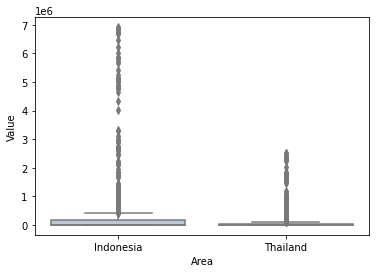

In [67]:
sns.boxplot(x = asean['Area'], y = asean['Value'], palette = 'vlag')

#### Outliers
Dapat dilihat pada grafik diatas,
Sebenarnya terdapat banyak outliers, hanya saja bila di hilangkan, akan mempengaruhi analisa data kita

### Analisis Data

In [68]:
asean.head()

,Area,Item,Element,Year,Unit,Value
0,Indonesia,"Ammonia, anhydrous",Import Quantity,2002,tonnes,202.50
1,Indonesia,"Ammonia, anhydrous",Import Quantity,2003,tonnes,0.02
2,Indonesia,"Ammonia, anhydrous",Import Quantity,2004,tonnes,5.95
3,Indonesia,"Ammonia, anhydrous",Import Quantity,2005,tonnes,25529.55
4,Indonesia,"Ammonia, anhydrous",Import Quantity,2006,tonnes,5999.43


In [69]:
asean['Item'].value_counts()

NPK fertilizers                                                             166
Urea                                                                        166
Ammonium sulphate                                                           162
Superphosphates above 35%                                                   158
Other NP compounds                                                          133
Potassium sulphate (sulphate of potash) (SOP)                               131
Potassium chloride (muriate of potash) (MOP)                                130
Fertilizers n.e.c.                                                          125
Other nitrogenous fertilizers, n.e.c.                                       125
Ammonia, anhydrous                                                          123
Other potassic fertilizers, n.e.c.                                          123
Other phosphatic fertilizers, n.e.c.                                        123
Phosphate rock                          

In [70]:
pd.crosstab(asean['Item'], columns='jumlah')

col_0,jumlah
Item,
"Ammonia, anhydrous",123
Ammonium nitrate (AN),113
Ammonium sulphate,162
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,96
Diammonium phosphate (DAP),104
Fertilizers n.e.c.,125
Monoammonium phosphate (MAP),113
NPK fertilizers,166
Other NK compounds,1


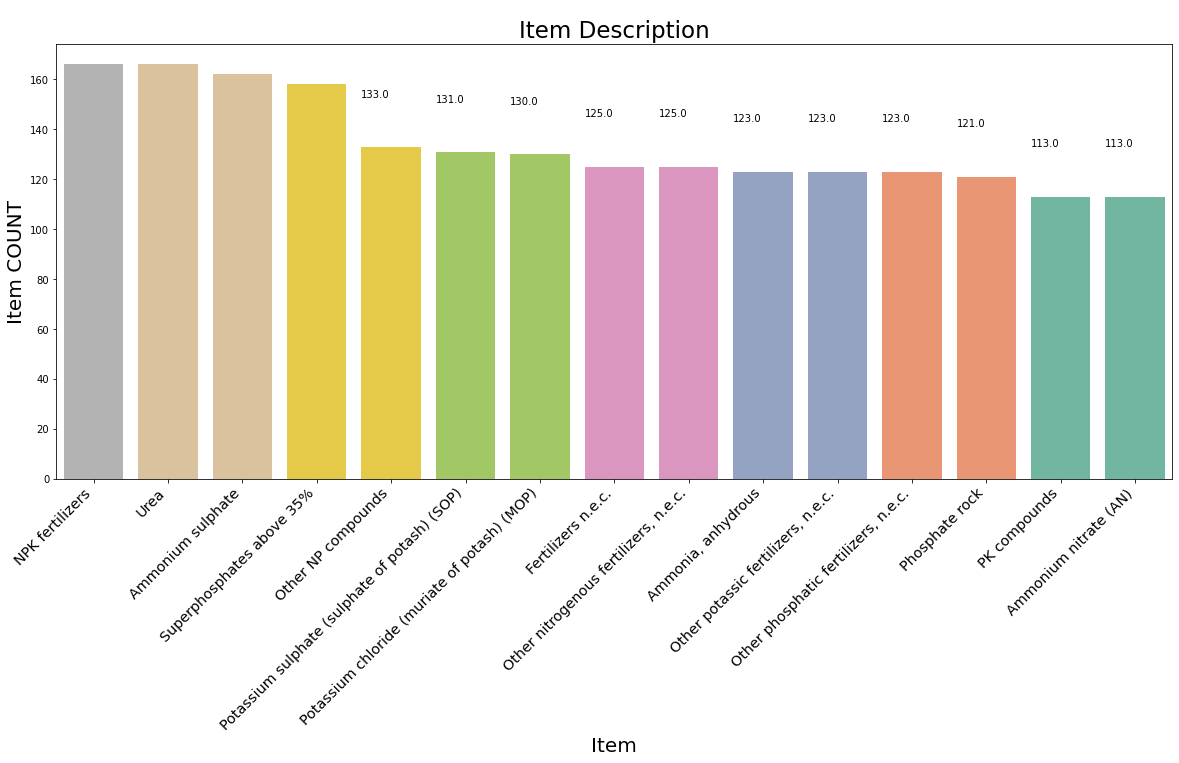

In [71]:
plt.figure(figsize=(20,8))
asean_Item = asean['Item'].value_counts().nlargest(15).astype(int)
ax = sns.barplot(asean_Item.index, asean_Item.values,palette= 'Set2_r')


plt.title('Item Description',fontsize=23)
plt.xlabel('Item',fontsize = 20)
plt.ylabel('Item COUNT',fontsize = 20)


plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x(), p.get_height()+20))

Dalam data, terlihat ada 15 item terbanyak yang digunakan sebagai pupuk

In [72]:
pd.crosstab(asean['Element'], columns='jumlah')

col_0,jumlah
Element,
Agricultural Use,188
Export Quantity,529
Export Value,529
Import Quantity,629
Import Value,629
Production,77


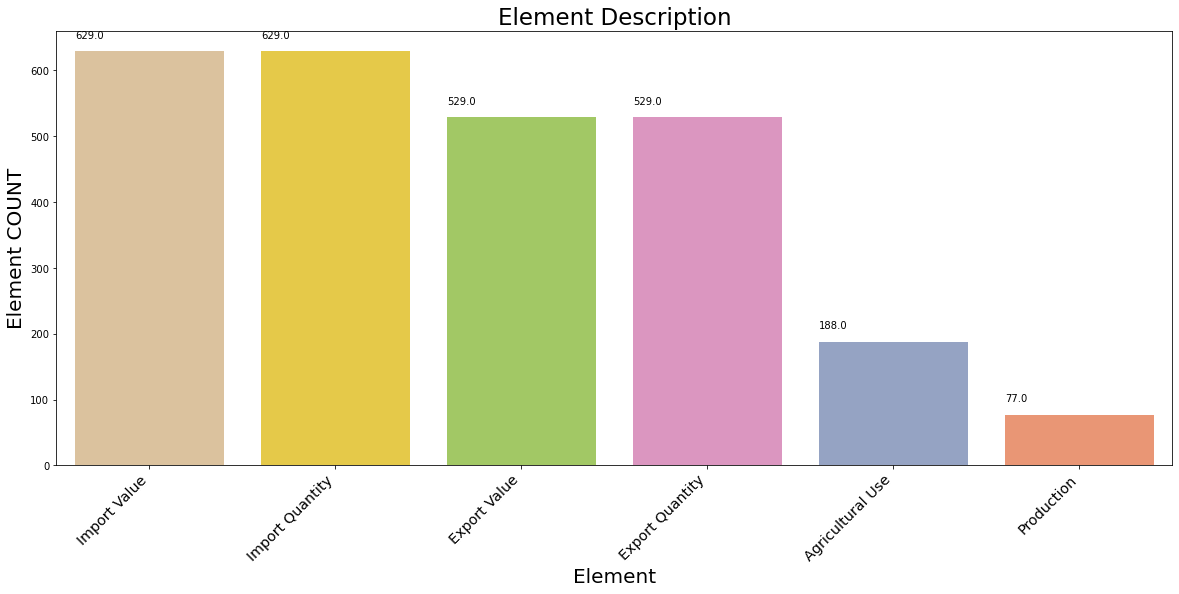

In [73]:
plt.figure(figsize=(20,8))
asean_Element = asean['Element'].value_counts().nlargest(15).astype(int)
ax = sns.barplot(asean_Element.index, asean_Element.values,palette= 'Set2_r')


plt.title('Element Description',fontsize=23)
plt.xlabel('Element',fontsize = 20)
plt.ylabel('Element COUNT',fontsize = 20)


plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x(), p.get_height()+20))

> Terlihat bahwa Thailand dan Indonesia banyak mendapatkan bahan untuk produksi pupuk dari import,
> sedangkan dalam penggunaan untuk pertanian, dua negara ini masih terbilang sedikit.

In [74]:
pd.crosstab(index=asean['Area'], columns=asean['Element'])

Element,Agricultural Use,Export Quantity,Export Value,Import Quantity,Import Value,Production
Area,,,,,,
Indonesia,69,246,246,325,325,74
Thailand,119,283,283,304,304,3


Text(0.5, 1.0, 'Fertilizers Elements in Indonesia')

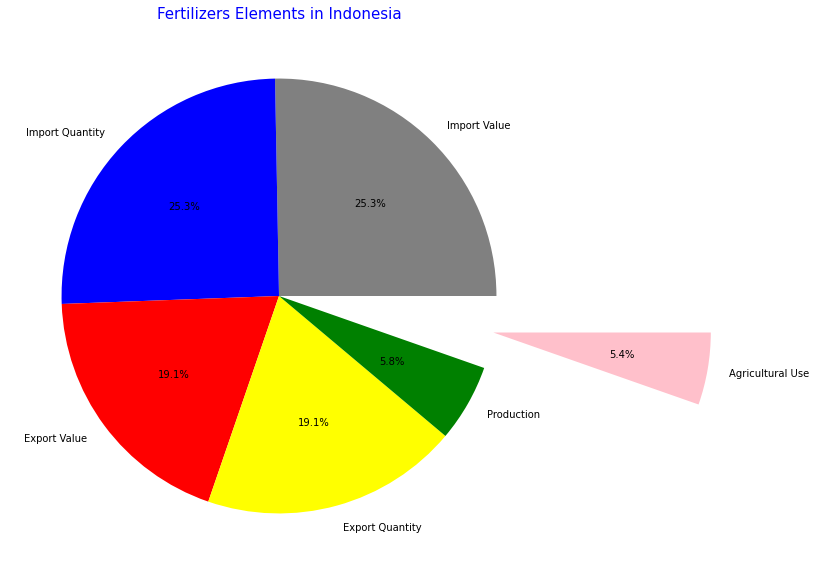

In [98]:
ina.Element.dropna(inplace=True)
labels=ina.Element.value_counts().index
colors=['grey','blue','red','yellow','green','pink']
explode=[0,0,0,0,0,1]
sizes=ina.Element.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('Fertilizers Elements in Indonesia',color='blue',fontsize=15)

Text(0.5, 1.0, 'export or import elements in Thailand')

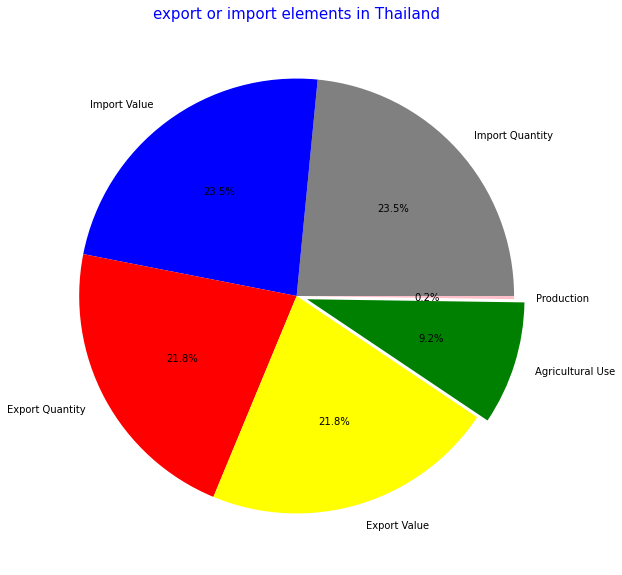

In [97]:
thai.Element.dropna(inplace=True)
labels=thai.Element.value_counts().index
colors=['grey','blue','red','yellow','green','pink']
explode=[0,0,0,0,0.05,0]
sizes=thai.Element.value_counts().values

plt.figure(figsize=(10,10))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('Fertilizers Elements in Thailand',color='blue',fontsize=15)

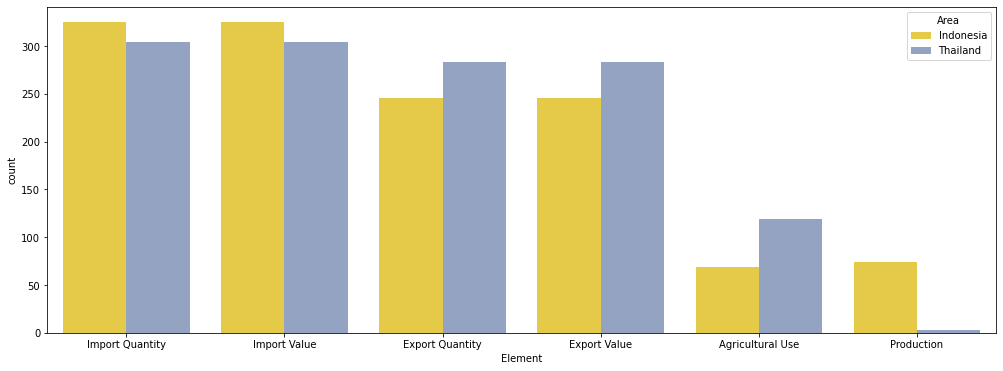

In [75]:
plt.figure(figsize = (17, 6))
sns.countplot('Element', hue = 'Area', data = asean , palette= 'Set2_r')

##### Analisa
Dalam tiga grafik di atas, ada beberapa yang dapat kita ketahui, yaitu:
   > Penggunaan pupuk di Indonesia lebih rendah dibandingkan dengan Thailand. 
   > Hal ini dapat mengindikasikan bahwa produksi pertanian Thailand sedikit lebih baik dari Indonesia.
    
   > Indonesia juga terlihat memiliki angka import bahan pupuk lebih banyak dari thailand.
   
   > Terdapat hal janggal yang terdapat pada dari angka export pupuk thailand, meskipun angka ekspor 
   > Thailand lebih tinggi dari Indonesia, angka produksi pupuk di Thailand berbeda jauh dari Indonesia. 

In [76]:
pd.crosstab(index=asean['Item'], columns=asean['Area'])

Area,Indonesia,Thailand
Item,,
"Ammonia, anhydrous",64,59
Ammonium nitrate (AN),52,61
Ammonium sulphate,92,70
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,37,59
Diammonium phosphate (DAP),35,69
Fertilizers n.e.c.,64,61
Monoammonium phosphate (MAP),45,68
NPK fertilizers,95,71
Other NK compounds,0,1


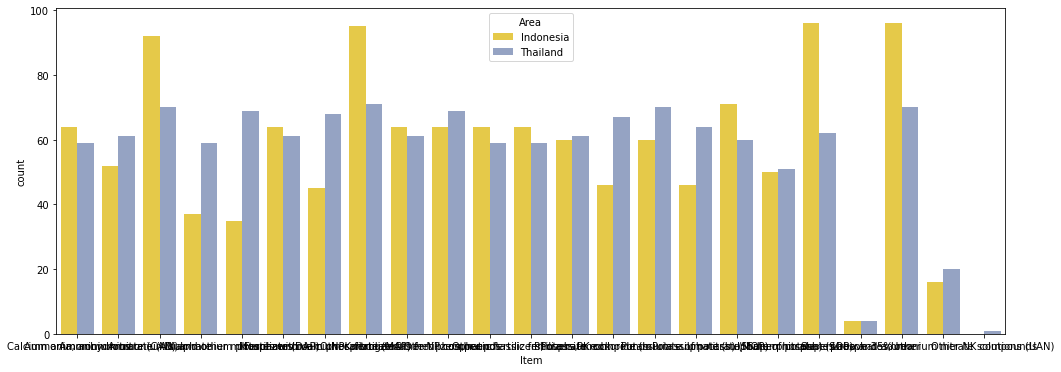

In [77]:
plt.figure(figsize = (17, 6))
sns.countplot('Item', hue = 'Area', data = asean , palette= 'Set2_r')

In [78]:
pd.crosstab(index=asean['Item'], columns=asean['Year'])

Year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Item,,,,,,,,,,,,,,,,
"Ammonia, anhydrous",8,8,6,8,8,8,8,8,8,8,8,8,8,9,8,4
Ammonium nitrate (AN),8,7,7,6,6,6,8,6,6,8,8,8,8,9,8,4
Ammonium sulphate,8,11,9,11,11,11,11,11,11,11,10,10,10,11,10,6
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,2,7,6,3,3,7,8,7,9,7,6,8,6,7,6,4
Diammonium phosphate (DAP),6,9,8,7,7,6,7,7,7,7,6,6,6,7,6,2
Fertilizers n.e.c.,8,8,8,8,8,8,8,8,8,8,8,8,8,9,8,4
Monoammonium phosphate (MAP),6,8,9,9,9,7,5,7,9,7,6,6,8,9,6,2
NPK fertilizers,10,11,11,11,11,11,11,11,11,11,10,9,10,11,10,7
Other NK compounds,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [79]:
pd.crosstab(index=[asean['Area'], asean['Element']], columns=asean['Year'])

Year                        2002  2003  2004  2005  2006  2007  2008  2009  \
Area      Element                                                            
Indonesia Agricultural Use     4     7     6     4     4     4     4     4   
          Export Quantity     14    14    13    15    17    14    16    15   
          Export Value        14    14    13    15    17    14    16    15   
          Import Quantity     19    21    20    20    19    20    20    20   
          Import Value        19    21    20    20    19    20    20    20   
          Production           4     5     5     4     4     4     5     5   
Thailand  Agricultural Use     0    12    11     9    10    11    10    12   
          Export Quantity     16    16    15    18    18    20    19    21   
          Export Value        16    16    15    18    18    20    19    21   
          Import Quantity     21    21    20    20    20    21    20    21   
          Import Value        21    21    20    20    20    21    20    21   
          Production           0     0     0     0     0     0     0     0   

Year                        2010  2011  2012  2013  2014  2015  2016  2017  
Area      Element                                                           
Indonesia Agricultural Use     4     4     4     4     4     4     4     4  
          Export Quantity     16    16    15    17    16    15    15    18  
          Export Value        16    16    15    17    16    15    15    18  
          Import Quantity     20    20    21    20    21    21    21    22  
          Import Value        20    20    21    20    21    21    21    22  
          Production           5     5     5     3     5     5     5     5  
Thailand  Agricultural Use    11    10     0     0     0    23     0     0  
          Export Quantity     19    21    20    20    20    20    20     0  
          Export Value        19    21    20    20    20    20    20     0  
          Import Quantity     20    20    20    20    20    20    20     0  
          Import Value        20    20    20    20    20    20    20     0  
          Production           0     0     0     0     0     0     0     3

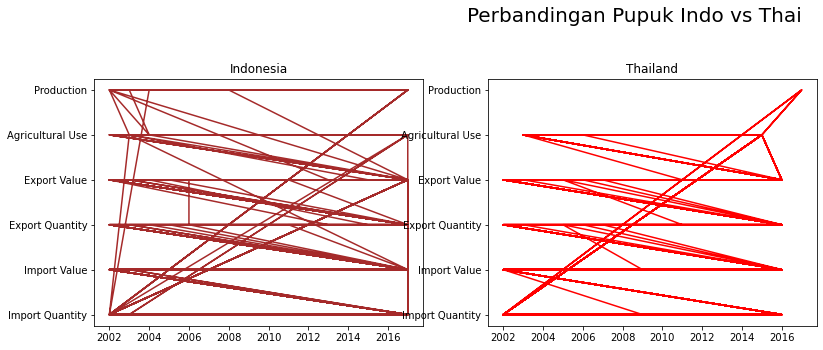

In [80]:
fig = plt.figure(figsize=(20,10))

fig.suptitle('Perbandingan Pupuk Indo vs Thai', fontsize=20)

ax1 = fig.add_subplot(231)
ax1.set_title('Indonesia')

ax1.plot(ina['Year'],
        ina['Element'],
        color='brown')

ax2 = fig.add_subplot(232)
ax2.set_title('Thailand')

ax2.plot(thai['Year'],
        thai['Element'],
        color='red')
#niatnya mau bikin line plot berdasarkan crosstab area dan element cuma gak nemu caranya

In [81]:
pd.crosstab(index=[asean['Area'], asean['Item']], columns=asean['Year'])

Year                                                          2002  2003  \
Area      Item                                                             
Indonesia Ammonia, anhydrous                                     4     4   
          Ammonium nitrate (AN)                                  4     3   
          Ammonium sulphate                                      4     6   
          Calcium ammonium nitrate (CAN) and other mixtur...     0     4   
          Diammonium phosphate (DAP)                             2     4   
          Fertilizers n.e.c.                                     4     4   
          Monoammonium phosphate (MAP)                           2     3   
          NPK fertilizers                                        6     6   
          Other NP compounds                                     4     4   
          Other nitrogenous fertilizers, n.e.c.                  4     4   
          Other phosphatic fertilizers, n.e.c.                   4     4   
          Other potassic fertilizers, n.e.c.                     4     4   
          PK compounds                                           2     2   
          Phosphate rock                                         4     4   
          Potassium chloride (muriate of potash) (MOP)           4     4   
          Potassium nitrate                                      2     2   
          Potassium sulphate (sulphate of potash) (SOP)          4     2   
          Sodium nitrate                                         4     4   
          Superphosphates above 35%                              6     6   
          Superphosphates, other                                 0     0   
          Urea                                                   6     6   
          Urea and ammonium nitrate solutions (UAN)              0     2   
Thailand  Ammonia, anhydrous                                     4     4   
          Ammonium nitrate (AN)                                  4     4   
          Ammonium sulphate                                      4     5   
          Calcium ammonium nitrate (CAN) and other mixtur...     2     3   
          Diammonium phosphate (DAP)                             4     5   
          Fertilizers n.e.c.                                     4     4   
          Monoammonium phosphate (MAP)                           4     5   
          NPK fertilizers                                        4     5   
          Other NK compounds                                     0     0   
          Other NP compounds                                     4     5   
          Other nitrogenous fertilizers, n.e.c.                  4     4   
          Other phosphatic fertilizers, n.e.c.                   2     4   
          Other potassic fertilizers, n.e.c.                     4     2   
          PK compounds                                           4     4   
          Phosphate rock                                         4     4   
          Potassium chloride (muriate of potash) (MOP)           4     5   
          Potassium nitrate                                      4     5   
          Potassium sulphate (sulphate of potash) (SOP)          2     3   
          Sodium nitrate                                         2     2   
          Superphosphates above 35%                              4     5   
          Superphosphates, other                                 0     0   
          Urea                                                   4     5   
          Urea and ammonium nitrate solutions (UAN)              2     3   

Year                                                          2004  2005  \
Area      Item                                                             
Indonesia Ammonia, anhydrous                                     4     4   
          Ammonium nitrate (AN)                                  3     2   
          Ammonium sulphate                                      4     6   
          Calcium ammonium nitrate (CAN) and ot

In [82]:
pd.crosstab(index=asean['Element'], columns=asean['Area'], normalize=True)

Area,Indonesia,Thailand
Element,,
Agricultural Use,0.026734,0.046106
Export Quantity,0.095312,0.109647
Export Value,0.095312,0.109647
Import Quantity,0.125920,0.117784
Import Value,0.125920,0.117784
Production,0.028671,0.001162


In [83]:
pd.crosstab(index=asean['Item'], columns=asean['Area'], normalize=True)

Area,Indonesia,Thailand
Item,,
"Ammonia, anhydrous",0.024797,0.022859
Ammonium nitrate (AN),0.020147,0.023634
Ammonium sulphate,0.035645,0.027121
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,0.014336,0.022859
Diammonium phosphate (DAP),0.013561,0.026734
Fertilizers n.e.c.,0.024797,0.023634
Monoammonium phosphate (MAP),0.017435,0.026346
NPK fertilizers,0.036807,0.027509
Other NK compounds,0.000000,0.000387


In [84]:
(pd.crosstab(index=asean['Element'], columns=asean['Area'], normalize=True)* 100).round(2)

Area,Indonesia,Thailand
Element,,
Agricultural Use,2.67,4.61
Export Quantity,9.53,10.96
Export Value,9.53,10.96
Import Quantity,12.59,11.78
Import Value,12.59,11.78
Production,2.87,0.12


In [85]:
(pd.crosstab(index=asean['Item'], columns=asean['Area'], normalize=True)* 100).round(2)

Area,Indonesia,Thailand
Item,,
"Ammonia, anhydrous",2.48,2.29
Ammonium nitrate (AN),2.01,2.36
Ammonium sulphate,3.56,2.71
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,1.43,2.29
Diammonium phosphate (DAP),1.36,2.67
Fertilizers n.e.c.,2.48,2.36
Monoammonium phosphate (MAP),1.74,2.63
NPK fertilizers,3.68,2.75
Other NK compounds,0.00,0.04


In [86]:
asean.head()

,Area,Item,Element,Year,Unit,Value
0,Indonesia,"Ammonia, anhydrous",Import Quantity,2002,tonnes,202.50
1,Indonesia,"Ammonia, anhydrous",Import Quantity,2003,tonnes,0.02
2,Indonesia,"Ammonia, anhydrous",Import Quantity,2004,tonnes,5.95
3,Indonesia,"Ammonia, anhydrous",Import Quantity,2005,tonnes,25529.55
4,Indonesia,"Ammonia, anhydrous",Import Quantity,2006,tonnes,5999.43


In [87]:
pd.crosstab(index=df['Item'], columns='rata-rata', values=asean['Value'], aggfunc='mean')

col_0,rata-rata
Item,
"Ammonia, anhydrous",723544.249859
Ammonium nitrate (AN),719095.176221
Ammonium sulphate,83210.616935
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,284005.853596
Diammonium phosphate (DAP),116877.481837
Fertilizers n.e.c.,124270.633133
Monoammonium phosphate (MAP),109930.356500
NPK fertilizers,53602.168520
Other NK compounds,1057.122500


In [88]:
pd.crosstab(index=df['Item'], columns='rata-rata', values=asean['Value'], aggfunc='mean')

col_0,rata-rata
Item,
"Ammonia, anhydrous",723544.249859
Ammonium nitrate (AN),719095.176221
Ammonium sulphate,83210.616935
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate,284005.853596
Diammonium phosphate (DAP),116877.481837
Fertilizers n.e.c.,124270.633133
Monoammonium phosphate (MAP),109930.356500
NPK fertilizers,53602.168520
Other NK compounds,1057.122500


In [92]:
pd.pivot_table(data=df, index='Item', columns=['Year', 'Element'], values='Value', aggfunc='median')

Year                                                           2002  \
Element                                            Agricultural Use   
Item                                                                  
Ammonia, anhydrous                                             0.00   
Ammonium nitrate (AN)                                       5468.00   
Ammonium sulphate                                           6095.23   
Calcium ammonium nitrate (CAN) and other mixtur...          2330.00   
Diammonium phosphate (DAP)                                  8516.00   
Fertilizers n.e.c.                                           631.60   
Monoammonium phosphate (MAP)                                2326.00   
NPK fertilizers                                             6426.00   
Other NK compounds                                              NaN   
Other NP compounds                                           420.52   
Other nitrogenous fertilizers, n.e.c.                        472.78   
Other phosphatic fertilizers, n.e.c.                           0.00   
Other potassic fertilizers, n.e.c.                           549.01   
PK compounds                                                  73.00   
Phosphate rock                                             42999.00   
Potassium chloride (muriate of potash) (MOP)                8000.00   
Potassium nitrate                                            538.00   
Potassium sulphate (sulphate of potash) (SOP)                974.00   
Sodium nitrate                                                 0.27   
Superphosphates above 35%                                   4522.00   
Superphosphates, other                                     33151.00   
Urea                                                       33195.00   
Urea and ammonium nitrate solutions (UAN)                    295.00   

Year                                                                \
Element                                            Export Quantity   
Item                                                                 
Ammonia, anhydrous                                        6200.000   
Ammonium nitrate (AN)                                     2935.175   
Ammonium sulphate                                          723.920   
Calcium ammonium nitrate (CAN) and other mixtur...        2715.820   
Diammonium phosphate (DAP)                                1388.360   
Fertilizers n.e.c.                                         381.940   
Monoammonium phosphate (MAP)                               244.900   
NPK fertilizers                                          12459.545   
Other NK compounds                                             NaN   
Other NP compounds                                        1206.450   
Other nitrogenous fertilizers, n.e.c.                      793.485   
Other phosphatic fertilizers, n.e.c.                       244.200   
Other potassic fertilizers, n.e.c.                         168.650   
PK compounds                                               132.000   
Phosphate rock                                             185.500   
Potassium chloride (muriate of potash) (MOP)               263.030   
Potassium nitrate                                           46.950   
Potassium sulphate (sulphate of potash) (SOP)               55.940   
Sodium nitrate                                              61.010   
Superphosphates above 35%                                  632.260   
Superphosphates, other                                    2011.000   
Urea                                                      5021.670   
Urea and ammonium nitrate solutions (UAN)                  239.370   

Year                                                             \
Element                                            Export Value   
Item                                                              
Ammonia, anhydrous                                      654.500   
Ammonium nitrate (AN)                                   563.250 

## Recommendation
Dari analisa dataset pupuk diatas, didapatkan beberapa rekomendasi sebagai berikut:
> Pengelolaan bahan pupuk di Indonesia, harusnya bisa lebih baik dari Thailand;

> Penggunaan bahan pupuk yang diperuntukkan pertanian harusnya ditambah agar produksi pertanian lebih baik